[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/colab_notebooks/blob/master/kaggle_mnist_digit_recognizer.ipynb)

**Kaggle Notebook**

For *Digit Recognizer* competition: 

https://www.kaggle.com/c/digit-recognizer

In [1]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 4.0MB/s 
    100% |████████████████████████████████| 235kB 7.2MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [2]:
## Load Kaggle config JSON
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c digit-recognizer -p data/

 97%|█████████████████████████████████████▊ | 71.0M/73.2M [00:00<00:00, 137MB/s]
100%|███████████████████████████████████████| 73.2M/73.2M [00:00<00:00, 162MB/s]
 96%|████████████████████████████████████▋ | 47.0M/48.8M [00:00<00:00, 69.3MB/s]
100%|███████████████████████████████████████| 48.8M/48.8M [00:00<00:00, 115MB/s]
  0%|                                                | 0.00/235k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 235k/235k [00:00<00:00, 138MB/s]


In [7]:
!ls data

sample_submission.csv  test.csv  train.csv


In [0]:
!kaggle competitions list

# Import packages and utilities

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Loading training and test dataset

In [0]:
input = pd.read_csv('./data/train.csv')

In [11]:
input.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = input.iloc[:, 0].values ## First column is the label
x = input.iloc[:, 1:].values

print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [8]:
X_test = pd.read_csv('./data/test.csv')

print(X_test.shape)

(28000, 784)


# Exploring y label and categorization

In [18]:
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
#from sklearn.preprocessing import OneHotEncoder

In [0]:
#enc = OneHotEncoder()
#enc.fit(x.split() for x in y)
#y_encoded = enc.transform(x.split() for x in y).toarray()

In [9]:
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
y_encoded = np_utils.to_categorical(y)
print(y_encoded.shape)

(42000, 10)


In [0]:
x_4d = x.reshape(x.shape[0], 28, 28, 1)

In [25]:
x_4d.shape

(42000, 28, 28, 1)

In [0]:
mean_px = x_4d.mean().astype(np.float32)
std_px = x_4d.std().astype(np.float32)

def normalize_data(X):
    return (X - mean_px) / std_px

In [0]:
#x_norm = normalize_data(x)

In [42]:
#x_norm.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.034736,-0.02527,-0.018025,-0.011473,-0.009099,-0.006897,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.034736,-0.02527,-0.018025,-0.011473,-0.009099,-0.006897,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.034736,-0.02527,-0.018025,-0.011473,-0.009099,-0.006897,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.034736,-0.02527,-0.018025,-0.011473,-0.009099,-0.006897,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.034736,-0.02527,-0.018025,-0.011473,-0.009099,-0.006897,NaN,NaN,NaN,NaN


In [15]:
x_norm = normalize_data(x_4d)

x_norm[:5,:]

array([[[[-0.42462978],
         [-0.42462978],
         [-0.42462978],
         ...,
         [-0.42462978],
         [-0.42462978],
         [-0.42462978]],

        [[-0.42462978],
         [-0.42462978],
         [-0.42462978],
         ...,
         [-0.42462978],
         [-0.42462978],
         [-0.42462978]],

        [[-0.42462978],
         [-0.42462978],
         [-0.42462978],
         ...,
         [-0.42462978],
         [-0.42462978],
         [-0.42462978]],

        ...,

        [[-0.42462978],
         [-0.42462978],
         [-0.42462978],
         ...,
         [-0.42462978],
         [-0.42462978],
         [-0.42462978]],

        [[-0.42462978],
         [-0.42462978],
         [-0.42462978],
         ...,
         [-0.42462978],
         [-0.42462978],
         [-0.42462978]],

        [[-0.42462978],
         [-0.42462978],
         [-0.42462978],
         ...,
         [-0.42462978],
         [-0.42462978],
         [-0.42462978]]],


       [[[-0.42462978],


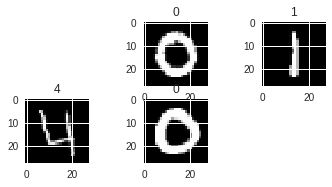

In [16]:
x_temp = x_norm.reshape(x_norm.shape[0], 28, 28)
for i in range(1, 5):
    plt.subplot(330 + (i+1))
    plt.imshow(x_temp[i], cmap=plt.get_cmap('gray'))
    plt.title(y[i]);

# Preparing Training Dataset

In [0]:
random_seed = 23

X_train, X_val, Y_train, Y_val = train_test_split(
    x_norm, y_encoded, test_size = 0.1, random_state = random_seed)

# Training input Dataset

In [0]:
from keras import layers
from keras import optimizers
from keras import activations
from keras import models

In [0]:
def create_CNN():
    model = models.Sequential([
        layers.core.Lambda(normalize_data, input_shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.core.Flatten(),
        layers.core.Dense(512, activation='relu'),
        layers.core.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [0]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

batches = gen.flow(X_train, Y_train, batch_size=64)
val_batches = gen.flow(X_val, Y_val, batch_size=64)

In [38]:
print(batches.n)

37800


In [0]:
model = create_CNN()

epochs = 3

model.optimizer.lr=0.0001

In [29]:
res = model.fit_generator(generator=batches,
                         steps_per_epoch=batches.n,
                         epochs=epochs,
                         validation_data=val_batches,
                         validation_steps=val_batches.n)


Epoch 1/3
37800/37800 [==============================] - 629s 17ms/step - loss: 0.0862 - acc: 0.9721 - val_loss: 0.0648 - val_acc: 0.9866
Epoch 2/3
37800/37800 [==============================] - 676s 18ms/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0723 - val_acc: 0.9869
Epoch 3/3
37800/37800 [==============================] - 677s 18ms/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0674 - val_acc: 0.9883


In [0]:
model.save_weights('model.h5')

In [31]:
!ls

adc.json  data	model.h5  sample_data


In [32]:
results = model.predict(X_test)

ValueError: ignored

In [0]:
X_test = X_test.values.reshape(X_test.shape[0], 28, 28,1)

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
results = pd.DataFrame({'ImageId': list(range(1, len(predictions)+1)),
    'Label': predictions
})

results.to_csv('submission.csv', index=False, header=True)

# Write output results to Drive folder

In [37]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get update
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

from google.colab import auth
from oauth2client.client import GoogleCredentials

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Hit:1 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.d

In [0]:
!mkdir -p kaggle-drive
!google-drive-ocamlfuse kaggle-drive

In [0]:
!cp submission.csv /content/kaggle-drive/kaggle_competitions/digit_recognizer